
Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit


Enter your choice (0 to exit):  1


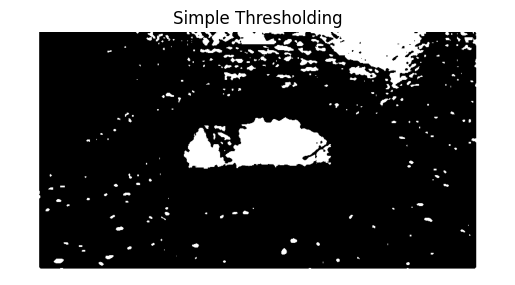


Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit


Enter your choice (0 to exit):  2


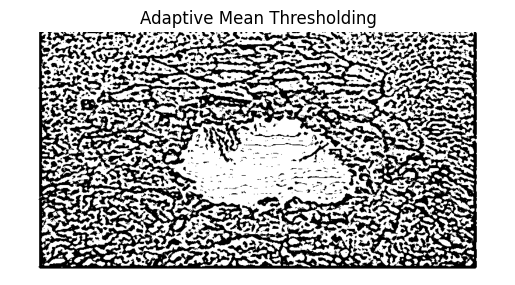


Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit


Enter your choice (0 to exit):  3


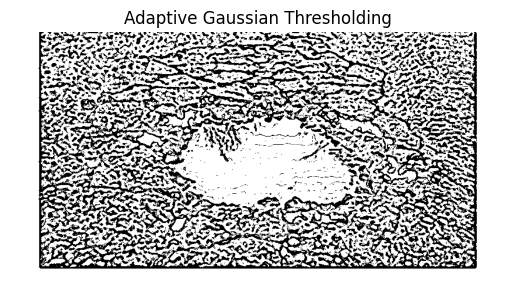


Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit


Enter your choice (0 to exit):  4


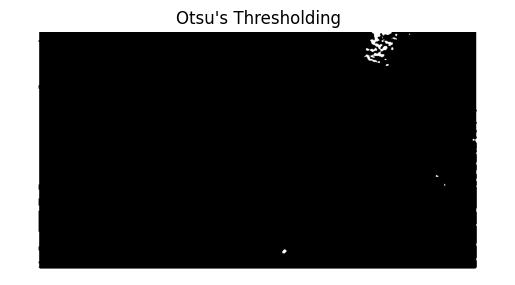


Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit


Enter your choice (0 to exit):  5
Enter seed point X-coordinate:  5
Enter seed point Y-coordinate:  5
Enter lower difference threshold:  4
Enter upper difference threshold:  3


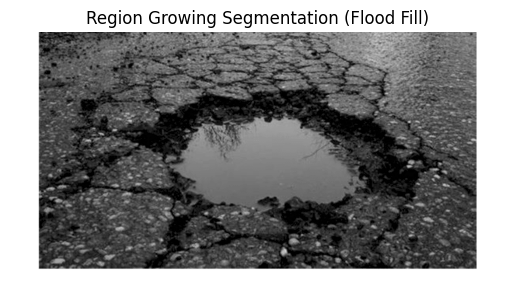


Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit


Enter your choice (0 to exit):  6


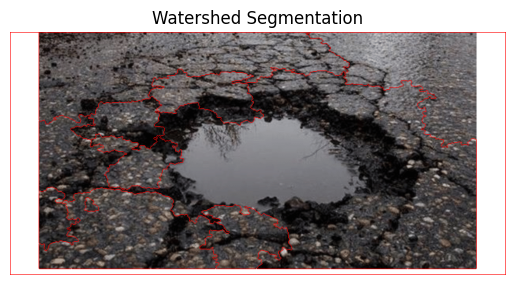


Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit


Enter your choice (0 to exit):  7


Invalid choice. Please try again.

Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit


Enter your choice (0 to exit):  0


Exiting the program.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageSegmentation:
    def __init__(self, image_path):
        self.image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        self.color_image = cv2.imread(image_path)  # For Watershed
        self.img_blurred = cv2.medianBlur(self.image, 5)

    def simple_threshold(self, threshold_value=127):
        _, thresh_binary = cv2.threshold(self.img_blurred, threshold_value, 255, cv2.THRESH_BINARY)
        plt.imshow(thresh_binary, cmap='gray')
        plt.title('Simple Thresholding')
        plt.axis('off')
        plt.show()

    def adaptive_mean_threshold(self):
        th_mean = cv2.adaptiveThreshold(self.img_blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        plt.imshow(th_mean, cmap='gray')
        plt.title('Adaptive Mean Thresholding')
        plt.axis('off')
        plt.show()

    def adaptive_gaussian_threshold(self):
        th_gaussian = cv2.adaptiveThreshold(self.img_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        plt.imshow(th_gaussian, cmap='gray')
        plt.title('Adaptive Gaussian Thresholding')
        plt.axis('off')
        plt.show()

    def otsu_threshold(self):
        _, th_otsu = cv2.threshold(self.img_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        plt.imshow(th_otsu, cmap='gray')
        plt.title("Otsu's Thresholding")
        plt.axis('off')
        plt.show()

    def region_growing_floodfill(self, seed, lo_diff=10, up_diff=10):
        flood_filled_image = self.image.copy()
        mask = np.zeros((self.image.shape[0] + 2, self.image.shape[1] + 2), np.uint8)
        cv2.floodFill(flood_filled_image, mask, seedPoint=seed, newVal=255, loDiff=(lo_diff,), upDiff=(up_diff,))
        plt.imshow(flood_filled_image, cmap='gray')
        plt.title('Region Growing Segmentation (Flood Fill)')
        plt.axis('off')
        plt.show()

    def watershed_segmentation(self):
        gray = cv2.cvtColor(self.color_image, cv2.COLOR_BGR2GRAY)
        _, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=2)

        sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
        dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
        _, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
        sure_fg = np.uint8(sure_fg)

        unknown = cv2.subtract(sure_bg, sure_fg)

        _, markers = cv2.connectedComponents(sure_fg)
        markers += 1
        markers[unknown == 255] = 0

        markers = cv2.watershed(self.color_image, markers)
        self.color_image[markers == -1] = [0, 0, 255]

        plt.imshow(cv2.cvtColor(self.color_image, cv2.COLOR_BGR2RGB))
        plt.title('Watershed Segmentation')
        plt.axis('off')
        plt.show()

def main_menu():
    print("\nImage Segmentation Menu:")
    print("1. Simple Thresholding")
    print("2. Adaptive Mean Thresholding")
    print("3. Adaptive Gaussian Thresholding")
    print("4. Otsu's Thresholding")
    print("5. Region Growing (Flood Fill)")
    print("6. Watershed Segmentation")
    print("0. Exit")

if __name__ == "__main__":

    segmenter = ImageSegmentation('Pothole2.png')

    while True:
        main_menu()
        choice = input("Enter your choice (0 to exit): ")

        if choice == '1':
            segmenter.simple_threshold()
        elif choice == '2':
            segmenter.adaptive_mean_threshold()
        elif choice == '3':
            segmenter.adaptive_gaussian_threshold()
        elif choice == '4':
            segmenter.otsu_threshold()
        elif choice == '5':
            x = int(input("Enter seed point X-coordinate: "))
            y = int(input("Enter seed point Y-coordinate: "))
            lo_diff = int(input("Enter lower difference threshold: "))
            up_diff = int(input("Enter upper difference threshold: "))
            segmenter.region_growing_floodfill(seed=(x, y), lo_diff=lo_diff, up_diff=up_diff)
        elif choice == '6':
            segmenter.watershed_segmentation()
        elif choice == '0':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please try again.")



In [ ]:
This code implements an **Image Segmentation system** using Python, OpenCV, and Matplotlib. It allows users to apply various image segmentation techniques like **thresholding, region growing, and watershed segmentation** interactively. Below is a detailed explanation of the code:

---

### **1. Class `ImageSegmentation`**

This class handles the loading of the input image and provides methods for performing segmentation.

#### **Attributes**
- **`self.image`**: A grayscale version of the input image loaded using `cv2.IMREAD_GRAYSCALE`.
- **`self.color_image`**: A color version of the input image, used for the watershed algorithm.
- **`self.img_blurred`**: A pre-processed version of the grayscale image, created using a median blur to reduce noise.

---

### **Methods**

#### **(a) `__init__(self, image_path)`**
- Takes the path of the image to be segmented.
- Loads the grayscale and color versions of the image.
- Applies a median blur to the grayscale image to prepare it for segmentation techniques.

---

#### **(b) `simple_threshold(self, threshold_value=127)`**
- Applies **Simple Thresholding**:
  - Pixels below the threshold (`127`) are set to `0` (black).
  - Pixels above or equal to the threshold are set to `255` (white).
- Uses `cv2.threshold()` with `cv2.THRESH_BINARY`.
- Displays the result using Matplotlib.

---

#### **(c) `adaptive_mean_threshold(self)`**
- Uses **Adaptive Mean Thresholding**:
  - Calculates the mean of the surrounding neighborhood for each pixel and thresholds it accordingly.
- Uses `cv2.adaptiveThreshold()` with `cv2.ADAPTIVE_THRESH_MEAN_C`.
- Suitable for images with varying lighting conditions.

---

#### **(d) `adaptive_gaussian_threshold(self)`**
- Applies **Adaptive Gaussian Thresholding**:
  - Similar to adaptive mean but uses a weighted sum of neighborhood values (Gaussian-weighted).
- More effective for edges and fine details.
- Displays the segmented image using Matplotlib.

---

#### **(e) `otsu_threshold(self)`**
- Uses **Otsu's Thresholding**:
  - Automatically calculates the optimal threshold value based on image histogram.
- Reduces manual effort in selecting a threshold.
- Combines `cv2.THRESH_BINARY` and `cv2.THRESH_OTSU` to achieve segmentation.
- Useful for bimodal images (foreground and background have distinct intensities).

---

#### **(f) `region_growing_floodfill(self, seed, lo_diff=10, up_diff=10)`**
- Implements **Region Growing** via Flood Fill:
  - Starts at a seed point provided by the user.
  - Expands to neighboring pixels based on intensity differences (`lo_diff` and `up_diff`).
- Uses `cv2.floodFill()` for growing the region.
- Displays the segmented result, highlighting the grown region.

**Parameters**:
- **`seed`**: A tuple (x, y) for the starting pixel.
- **`lo_diff`** and **`up_diff`**: Control the tolerance for growing the region.

---

#### **(g) `watershed_segmentation(self)`**
- Performs **Watershed Segmentation**:
  - Converts the image to grayscale and applies binary thresholding.
  - Identifies sure background (using dilation) and sure foreground (using distance transform).
  - Marks unknown regions by subtracting the foreground from the background.
  - Uses `cv2.watershed()` to segment the image.
  - Outlines boundaries with red (`[0, 0, 255]`).

**Steps**:
1. Create a binary inverse image with `cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU`.
2. Define the **sure background** using morphological dilation.
3. Compute the **sure foreground** using a distance transform and thresholding.
4. Identify **unknown regions** by subtracting foreground from the background.
5. Label connected components and apply the watershed algorithm.
6. Display the result with segmented regions outlined in red.

---

### **2. Main Menu**

The **main menu** allows the user to interact with the segmentation system through various options.

#### **`main_menu()`**
- Displays the available segmentation techniques:
  - Simple Thresholding
  - Adaptive Mean Thresholding
  - Adaptive Gaussian Thresholding
  - Otsu's Thresholding
  - Region Growing (Flood Fill)
  - Watershed Segmentation

---

### **3. Main Program Execution**
- The program starts by creating an instance of `ImageSegmentation` with the image `'Pothole2.png'`.

#### **Interaction**
1. Displays the menu to the user in a loop.
2. Prompts the user to select an option:
   - Based on the choice, the corresponding method is invoked.
   - For region growing, the user is asked to input:
     - A **seed point** (X, Y coordinates).
     - **Lower and upper intensity differences** (`lo_diff` and `up_diff`).
   - Other methods directly process and display the results.

#### **Exiting**
- The user can exit the program by selecting option `0`.

---

### **Key Features**
- **Interactivity**: Users can apply and visualize different segmentation techniques on the fly.
- **Dynamic Inputs**: Region growing requires user input for fine control.
- **Visualization**: Results are displayed with Matplotlib for better comprehension.
- **Flexibility**: Multiple algorithms cover a range of segmentation tasks, from global thresholding to region-based methods.

This code is a complete framework for experimenting with image segmentation techniques, providing both simplicity (thresholding) and complexity (watershed segmentation). It can be further extended with more advanced methods if needed.